---

# Lecture 7.2 Scikit-learn

**Scikit-learn** is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. Key concepts and features include:

* Algorithmic decision-making methods, including:
    - Classification: identifying and categorizing data based on patterns.
    - Regression: predicting or projecting data values based on the average mean of existing and planned data.
    - Clustering: automatic grouping of similar data into datasets.


* Algorithms that support predictive analysis ranging from simple linear regression to neural network pattern recognition.


* Interoperability with NumPy, pandas, and matplotlib libraries.


## Why Use Scikit-Learn For Machine Learning?

Whether you are just looking for an introduction to ML, want to get up and running fast, or are looking for the latest ML research tool, you will find that scikit-learn is both well-documented and easy to learn/use. As a high-level library, it lets you define a predictive data model in just a few lines of code, and then use that model to fit your data. It’s versatile and integrates well with other Python libraries, such as matplotlib for plotting, numpy for array vectorization, and pandas for dataframes.

Though scikit-learn has deep learning capabilities, one will typically use **tensorflow** or **pytorch** when working with deep learning models. However, most any other model that you work with will be best implemented with scikit-learn. 

In this notebook we introduce the basic concepts of the scikit-learn API, and in doing so, implement several of the algorithms that we have covered thus far in our course. 

---

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load iris data 
iris = sns.load_dataset("iris")

# Create Numer ndarrays
X = iris[["sepal_length","sepal_width"]].to_numpy()
y = iris["species"].to_numpy()

def make_labels(y):
    if y == "setosa":
        return 0
    elif y == "versicolor":
        return 1
    else:
        return 2

y = np.array([make_labels(flower) for flower in y])

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors=7)

---

Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be **fitted** to some data using its ```fit``` method.

The fit method generally accepts 2 inputs:

The samples matrix (or design matrix) ```X```. The size of ```X``` is typically ```(n_samples, n_features)```, which means that samples are represented as rows and features are represented as columns.

The target values ```y``` which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervized learning tasks, ```y``` does not need to be specified. ```y``` is usually 1d array where the i-th entry corresponds to the target of the i-th sample (row) of ```X```.

Both ```X``` and ```y``` are usually expected to be numpy arrays or equivalent array-like data types, though some estimators work with other formats such as sparse matrices.

---

In [25]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

---

Once the estimator is fitted, it can be used for predicting target values of new data. You don’t need to re-train the estimator

---

In [16]:
clf.predict(X_train)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [45]:
clf.score(X_test, y_test)

0.8

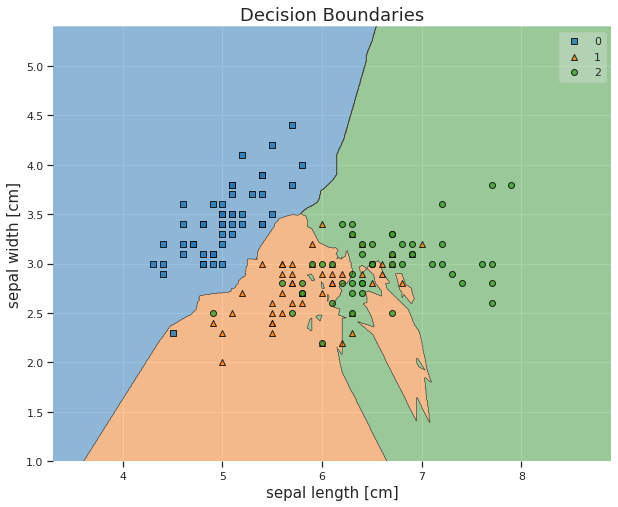

In [27]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

[[19  0  0]
 [ 0  9  6]
 [ 0  4 12]]


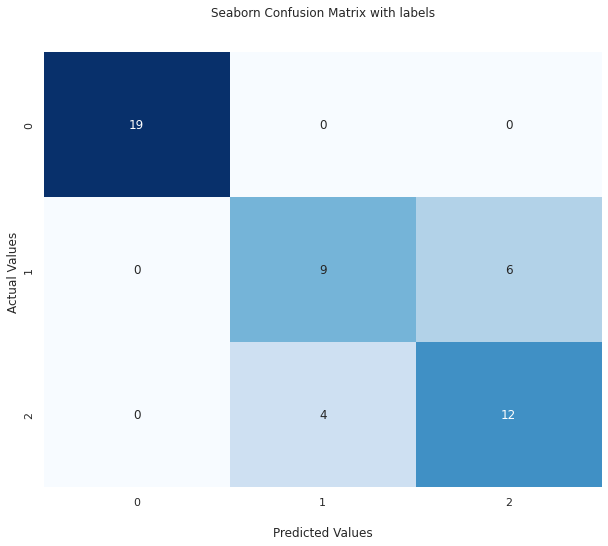

In [44]:
from sklearn.metrics import confusion_matrix

#Fit the model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train,y_train)#Generate predictions with the model using our X values
y_pred = clf.predict(X_test)#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


plt.figure(figsize = (10, 8))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar = False)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()


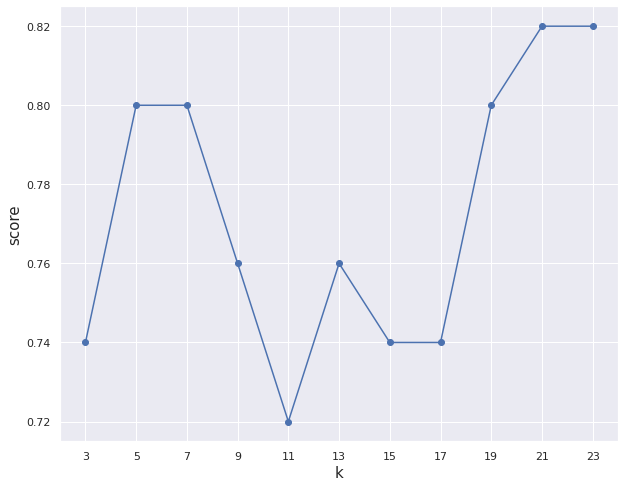

In [29]:
scores_list = []
for k in range(3, 24, 2):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    scores_list.append(clf.score(X_test, y_test))

plt.figure(figsize = (10, 8))
plt.plot([x for x in range(3, 24, 2)],
        scores_list, 
        marker = "o")
plt.xlabel("k", fontsize = 15)
plt.ylabel("score", fontsize = 15)
plt.xticks([x for x in range(3, 24, 2)])
plt.show()